In [1]:
import numpy as np
import sklearn
from IPython import get_ipython
import import_ipynb
get_ipython().run_line_magic('run','03_LASSO_Regression.ipynb')

Data shape: (150, 4)

Labels shape: (150,)

Coefficients: array([ 0.        , -0.        ,  0.40811896,  0.        ])

Intercept: -0.5337110569441172

R2: 0.895821120274704



# A. Additional evaluation datasets 
Sometimes, it's not enough to just have a single testing set for model evaluation. Having additional sets of data for evaluation gives us a more accurate measurement of how good the model is for the original dataset.

If the original dataset is big enough, we can actually split it into three subsets: training, testing, and validation. The validation set is about the same size as the testing set, and it is used for evaluating the model after training. The testing set is then used for final evaluation once the model is done training and tuning.

However, partitioning the original dataset into three distinct sets will cut into the size of the training set. This can reduce the performance of the model if our original dataset is not large enough. A solution to this problem is cross-validation (CV).

Cross-validation creates synthetic validation sets by partitioning the training set into multiple smaller subsets. One of the most common algorithms for cross-validation, K-Fold CV, partitions the training set into k approximately equal sized subsets (referred to as folds). There are k "rounds" of the algorithm, and each "round" chooses one of the k subsets for the validation set (a different subset is chosen each round), while the remaining k - 1 subsets are aggregated into the round's training set and used to train the model.
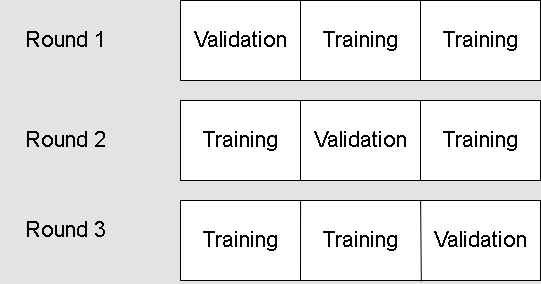
  
  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;The K-Fold cross-validation process with 3 folds (k=3)

  Each round of the K-Fold algorithm, the model is trained on that round's training set (the combined training folds) and then evaluated on the single validation fold. The evaluation metric depends on the model. For classification models, this is usually classification accuracy on the validation set. For regression models, this can either be the model's mean squared error, mean absolute error, or R2 value on the validation set.

# B. Scored cross-validation 
In scikit-learn, we can easily implement K-Fold cross-validation with the cross_val_score function (also part of the model_selection module). The function returns an array containing the evaluation score for each round.

The code below demonstrates K-Fold CV with 3 folds for classification. The evaluation metric is classification accuracy.

In [5]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
# We can skip max_iter argument here, but it will produce a
# ConvergenceWarning. Therefore we explicity give a bigger value to
# avoid the warning.
clf = linear_model.LogisticRegression(max_iter = 3000)
# predefined data and labels
cv_score = cross_val_score(clf, data, labels, cv=3)
print(repr(data))
print(repr(labels))
print(repr(data.shape))
print('{}\n'.format(repr(cv_score)))

# but the actual data of this program is bigger than this which we have used and of shape(569,30)
# and our data shape is (150,4)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

The code below demonstrates K-Fold CV with 4 folds for regression. The evaluation metric is R2 value.

In [6]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
reg = linear_model.LinearRegression()
# Predefined data and labels
cv_score = cross_val_score(reg, data, labels, cv=4)  # k = 4

print('{}\n'.format(repr(cv_score)))

array([0.        , 0.67313485, 0.70431199, 0.        ])



Note that we don't call fit with the model prior to using cross_val_score. This is because the cross_val_score function will use fit for training the model each round.

For classification models, the cross_val_score function will apply a special form of the K-Fold algorithm called stratified K-Fold. This just means that each fold will contain approximately the same class distribution as the original dataset. For example, if the original dataset contained 60% class 0 data observations and 40% class 1, each fold of the stratified K-Fold algorithm will have about the same 60-40 split between class 0 and class 1 data observations.

While cross-validation gives us a better measurement of the model's fit on the original dataset, it can be very time-consuming when used on large datasets. For large enough datasets, it is better to just split it into training, validation, and testing sets, and then use the validation set for evaluating the model before it is finalized.